## Necessary dependencies and path

In [1]:
import subprocess
import sys
import os

# List of required dependencies (external packages only)
dependencies = ["torch", "torchvision", "Pillow", "opencv-python", "numpy", "scikit-image", "scipy", "scikit-learn"]

print("Installation of dependencies...")
for package in dependencies:
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

print("✓ All dependencies has been installed !")

# Add the project root folder to the path
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

print("✓ The project root has been initialized !")

Installation of dependencies...
✓ All dependencies has been installed !
✓ The project root has been initialized !


## Importing functions

In [9]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import config
from unet_model import model, dataset, train, test

# Reload
importlib.reload(config)
importlib.reload(model)
importlib.reload(dataset)
importlib.reload(train)
importlib.reload(test)

from config import DATASET_NORMALIZER_DIR, UNET_MODEL_DIR, SAVED_MODELS_DIR, UNet_BUSI_benign, UNet_BUSI_malignant, UNet_ISBI
from unet_model.dataset import dataset_ds
from unet_model.train import train_model_paper, train_model_study
from unet_model.test import test_model

print("✓ All functions has been imported !")

✓ All functions has been imported !


# --- I. Paper version ---

## 1. Importing model and dataset

In [5]:
model_dir = SAVED_MODELS_DIR
model_save = UNet_ISBI
root_dir = r"D:\Documents_\_5e_Annee\MLA\bdd\_normalized\ISBI"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
 
train_ds, _, test_ds = dataset_ds(root_dir)

Using device: cuda


## 2. Model's training

In [6]:
model, train_losses = train_model_paper(model_dir, model_save, train_ds, device)

Starting training...

Epoch 1/1000
  Train Loss: 0.6436
Epoch 2/1000
  Train Loss: 0.6340
Epoch 3/1000
  Train Loss: 0.5853
Epoch 4/1000
  Train Loss: 0.5880
Epoch 5/1000
  Train Loss: 0.5573
Epoch 6/1000
  Train Loss: 0.5815
Epoch 7/1000
  Train Loss: 0.5768
Epoch 8/1000
  Train Loss: 0.5728
Epoch 9/1000
  Train Loss: 0.5619
Epoch 10/1000
  Train Loss: 0.5757
Epoch 11/1000
  Train Loss: 0.5786
Epoch 12/1000
  Train Loss: 0.5746
Epoch 13/1000
  Train Loss: 0.5735
Epoch 14/1000
  Train Loss: 0.5648
Epoch 15/1000
  Train Loss: 0.5762
Epoch 16/1000
  Train Loss: 0.5670
Epoch 17/1000
  Train Loss: 0.5668
Epoch 18/1000
  Train Loss: 0.5714
Epoch 19/1000
  Train Loss: 0.5692
Epoch 20/1000
  Train Loss: 0.5596
Epoch 21/1000
  Train Loss: 0.5615
Epoch 22/1000
  Train Loss: 0.5761
Epoch 23/1000
  Train Loss: 0.5666
Epoch 24/1000
  Train Loss: 0.5842
Epoch 25/1000
  Train Loss: 0.5681
Epoch 26/1000
  Train Loss: 0.5667
Epoch 27/1000
  Train Loss: 0.5758
Epoch 28/1000
  Train Loss: 0.5655
Epoch 2

## 3. Visualizing the evolution of the model's training

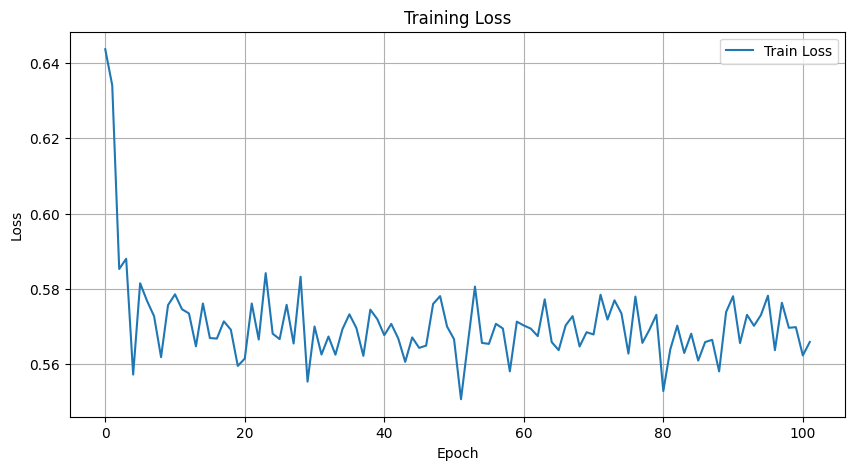

In [7]:
def plot_training_curves(train_losses):
    """Plot training and validation loss curves."""
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Get some sample images and masks from the test set
plot_training_curves(train_losses)

## 4. Visualizing the result of testing


Model loaded. Starting evaluation...



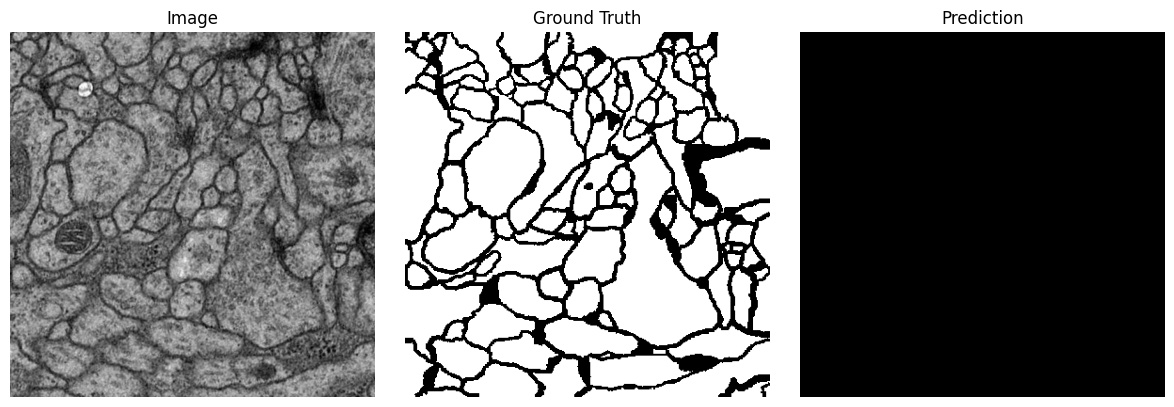


======= TEST RESULTS =======
Warping Error: 1.0000
Rand Error:    1.0000
Pixel Error:   0.2287
IoU Score:     0.7713


In [10]:
mean_warp, mean_rand, mean_pix, mean_iou = test_model(model_dir, model_save, test_ds, device)

## 5. Image analysis

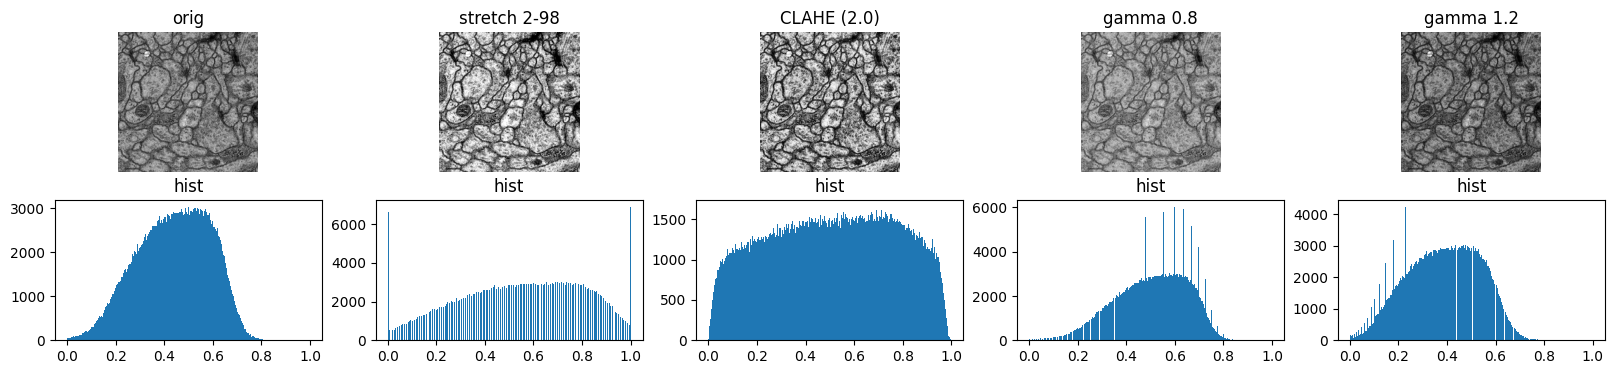

orig {'mean': 0.4401831328868866, 'std': 0.14994774758815765, 'rms': 0.14994774758815765, 'min': 0.0, 'max': 1.0, 'p2': 0.12941177189350128, 'p98': 0.6980392336845398, 'skew': -0.22932356595993042}
stretch 2-98 {'mean': 0.5466624920013066, 'std': 0.257541232765451, 'rms': 0.257541232765451, 'min': 0.0, 'max': 1.0, 'p2': 0.0, 'p98': 1.0, 'skew': -0.22253783136681674}
CLAHE (2.0) {'mean': 0.5072740316390991, 'std': 0.26085975766181946, 'rms': 0.26085975766181946, 'min': 0.0, 'max': 1.0, 'p2': 0.04313725605607033, 'p98': 0.9450980424880981, 'skew': -0.0724198967218399}
gamma 0.8 {'mean': 0.5132596492767334, 'std': 0.1449155956506729, 'rms': 0.1449155956506729, 'min': 0.0, 'max': 1.0, 'p2': 0.19479554891586304, 'p98': 0.7500735521316528, 'skew': -0.4127888083457947}
gamma 1.2 {'mean': 0.3791176974773407, 'std': 0.15020160377025604, 'rms': 0.15020160377025604, 'min': 0.0, 'max': 1.0, 'p2': 0.08597426861524582, 'p98': 0.6496146321296692, 'skew': -0.06819552928209305}


In [11]:
from torch.utils.data import DataLoader
from dataset_normalizer.image_analysis import compare_contrast_methods

test_loader = DataLoader(test_ds, batch_size=1, shuffle=False, num_workers=0, pin_memory=True)

# Get a sample image from the test set
img, _ = test_loader.dataset[0]
img = img.squeeze().detach().cpu().numpy()   # -> numpy HxW
img = img.astype(np.float32)
if img.max() > 1.0:
    img = img / 255.0

# Visualize contrast enhancement methods on a sample image
compare_contrast_methods(img, methods=None, titles=None, show_hist=True)

## 6. Importing new model and dataset with normalized images

In [12]:
model_dir = SAVED_MODELS_DIR
model_save_1 = "1_" + UNet_ISBI
root_dir_1 = r"D:\Documents_\_5e_Annee\MLA\bdd\_normalized\ISBI_1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

train_ds_1, _, test_ds_1 = dataset_ds(root_dir_1)

Using device: cuda


## 7. Model's training with normalized images

In [13]:
model_1, train_losses_1 = train_model_paper(model_dir, model_save_1, train_ds_1, device)

Starting training...

Epoch 1/1000
  Train Loss: 0.6435
Epoch 2/1000
  Train Loss: 0.6324
Epoch 3/1000
  Train Loss: 0.5832
Epoch 4/1000
  Train Loss: 0.5869
Epoch 5/1000
  Train Loss: 0.5554
Epoch 6/1000
  Train Loss: 0.5756
Epoch 7/1000
  Train Loss: 0.5774
Epoch 8/1000
  Train Loss: 0.5679
Epoch 9/1000
  Train Loss: 0.5590
Epoch 10/1000
  Train Loss: 0.5715
Epoch 11/1000
  Train Loss: 0.5725
Epoch 12/1000
  Train Loss: 0.5715
Epoch 13/1000
  Train Loss: 0.5696
Epoch 14/1000
  Train Loss: 0.5678
Epoch 15/1000
  Train Loss: 0.5777
Epoch 16/1000
  Train Loss: 0.5684
Epoch 17/1000
  Train Loss: 0.5747
Epoch 18/1000
  Train Loss: 0.5789
Epoch 19/1000
  Train Loss: 0.5709
Epoch 20/1000
  Train Loss: 0.5606
Epoch 21/1000
  Train Loss: 0.5678
Epoch 22/1000
  Train Loss: 0.5778
Epoch 23/1000
  Train Loss: 0.5710
Epoch 24/1000
  Train Loss: 0.5907
Epoch 25/1000
  Train Loss: 0.5733
Epoch 26/1000
  Train Loss: 0.5680
Epoch 27/1000
  Train Loss: 0.5774
Epoch 28/1000
  Train Loss: 0.5684
Epoch 2

## 8. Comparison of the evolution of training models

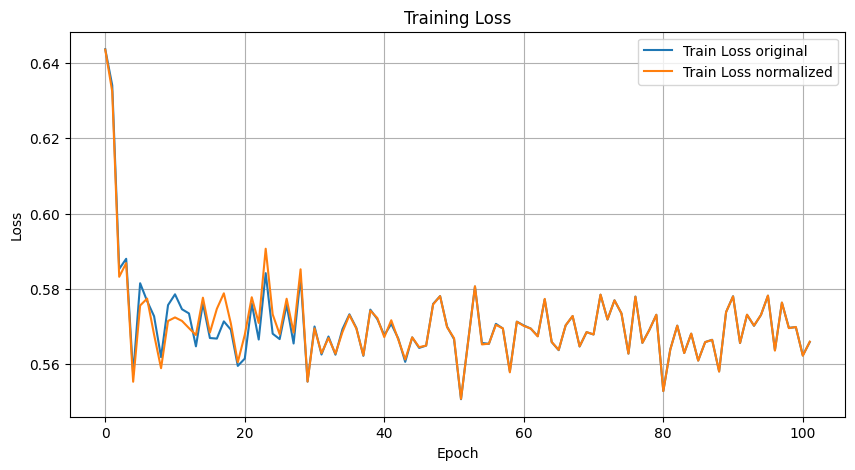

In [14]:
def plot_training_curves(train_losses, train_losses_1):
    """Plot training and validation loss curves."""
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss original")
    plt.plot(train_losses_1, label="Train Loss normalized")
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Get some sample images and masks from the test set
plot_training_curves(train_losses, train_losses_1)

## 9. Visualizing the result of testing with normalized images


Model loaded. Starting evaluation...



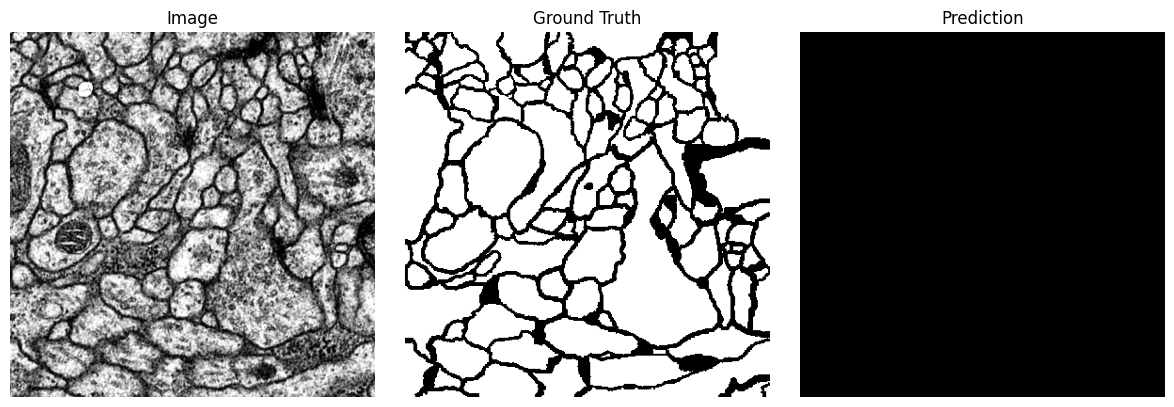


======= TEST RESULTS =======
Warping Error: 1.0000
Rand Error:    1.0000
Pixel Error:   0.2287
IoU Score:     0.7713


In [15]:
mean_warp_1, mean_rand_1, mean_pix_1, mean_iou_1 = test_model(model_dir, model_save_1, test_ds_1, device)

# --- II. Study version ---

## 1. Model's training

In [107]:
# Order of hyperparameters : epochs, learning_rate, momentum, dropout_rate, batch_size
hyperparams = ([50, 100], [0.01, 0.001], [0.9, 0.99], [0.2, 0.35, 0.5], [2, 4])

model_dir = SAVED_MODELS_DIR
model_save = UNet_ISBI
root_dir = r"D:\Documents #\5e Année\MLA\bdd\_normalized\ISBI"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
 
train_ds, val_ds, test_ds = dataset_ds(root_dir)
# Create subsets for hyperparameter study with K-Fold Cross Validation
train_subset, val_subset = """
To be continued
"""

pass
model, train_losses, val_losses = train_model_study(model_dir, model_save, train_subset, val_subset, hyperparams)

Using device: cuda


ValueError: too many values to unpack (expected 2)

## 2. Visualizing the evolution of the model's training

In [108]:
def plot_training_curves(train_losses, val_losses):
    """Plot training and validation loss curves."""
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Get some sample images and masks from the test set
plot_training_curves(train_losses, val_losses)

NameError: name 'val_losses' is not defined

## 3. Visualizing the result of testing

In [109]:
model_dir = SAVED_MODELS_DIR
model_save_tot = "50_0.01_0.9_0.2_2_unet_isbi.pth"
# Evaluate on test set
mean_warp, mean_rand, mean_pix, mean_iou = test_model(model_dir, model_save_tot, test_ds, device)

FileNotFoundError: [Errno 2] No such file or directory: 'd:\\Documents #\\5e Année\\MLA\\Projet\\saved_models\\50_0.01_0.9_0.2_2_unet_isbi.pth'